In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train =  pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
df_test =  pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")

In [4]:
df_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [5]:
df_train.shape

(750000, 18)

In [6]:
df_test.shape

(250000, 17)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [8]:
len(df_train['id'].unique())

750000

In [9]:
df_train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         250000 non-null  int64 
 1   age        250000 non-null  int64 
 2   job        250000 non-null  object
 3   marital    250000 non-null  object
 4   education  250000 non-null  object
 5   default    250000 non-null  object
 6   balance    250000 non-null  int64 
 7   housing    250000 non-null  object
 8   loan       250000 non-null  object
 9   contact    250000 non-null  object
 10  day        250000 non-null  int64 
 11  month      250000 non-null  object
 12  duration   250000 non-null  int64 
 13  campaign   250000 non-null  int64 
 14  pdays      250000 non-null  int64 
 15  previous   250000 non-null  int64 
 16  poutcome   250000 non-null  object
dtypes: int64(8), object(9)
memory usage: 32.4+ MB


In [11]:
df_train = df_train.drop(columns=['id'],axis=1)
df_test = df_test.drop(columns=['id'],axis=1)

In [12]:
df_train.shape

(750000, 17)

In [13]:
df_test.shape

(250000, 16)

In [14]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


# EDA (Exploratory Data Analysis)

In [15]:
for col in df_train.columns:
    unique_count = df_train[col].nunique()
    print(f"{col}: {unique_count} unique values")

age: 78 unique values
job: 12 unique values
marital: 3 unique values
education: 4 unique values
default: 2 unique values
balance: 8217 unique values
housing: 2 unique values
loan: 2 unique values
contact: 3 unique values
day: 31 unique values
month: 12 unique values
duration: 1760 unique values
campaign: 52 unique values
pdays: 596 unique values
previous: 50 unique values
poutcome: 4 unique values
y: 2 unique values


In [16]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'day']
num_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [17]:
print("Categorical Columns:")
for col in cat_columns:
    print(f"{col}: {df_train[col].nunique()} unique values")

print("\nNumerical Columns:")
for col in num_columns:
    print(f"{col}: {df_train[col].nunique()} unique values")

Categorical Columns:
job: 12 unique values
marital: 3 unique values
education: 4 unique values
default: 2 unique values
housing: 2 unique values
loan: 2 unique values
contact: 3 unique values
month: 12 unique values
poutcome: 4 unique values
day: 31 unique values

Numerical Columns:
age: 78 unique values
balance: 8217 unique values
duration: 1760 unique values
campaign: 52 unique values
pdays: 596 unique values
previous: 50 unique values


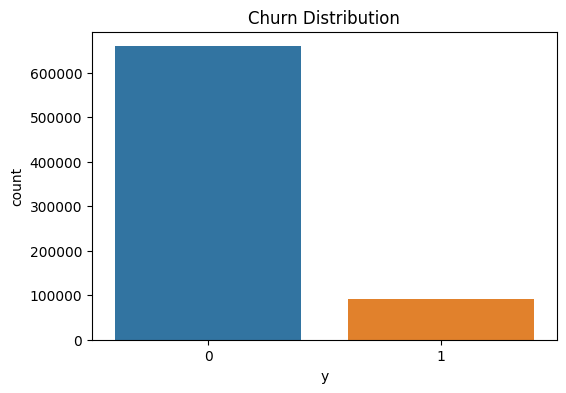

y
0    87.934933
1    12.065067
Name: proportion, dtype: float64


In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df_train)
plt.title('Churn Distribution')
plt.show()

print(df_train['y'].value_counts(normalize=True) * 100)

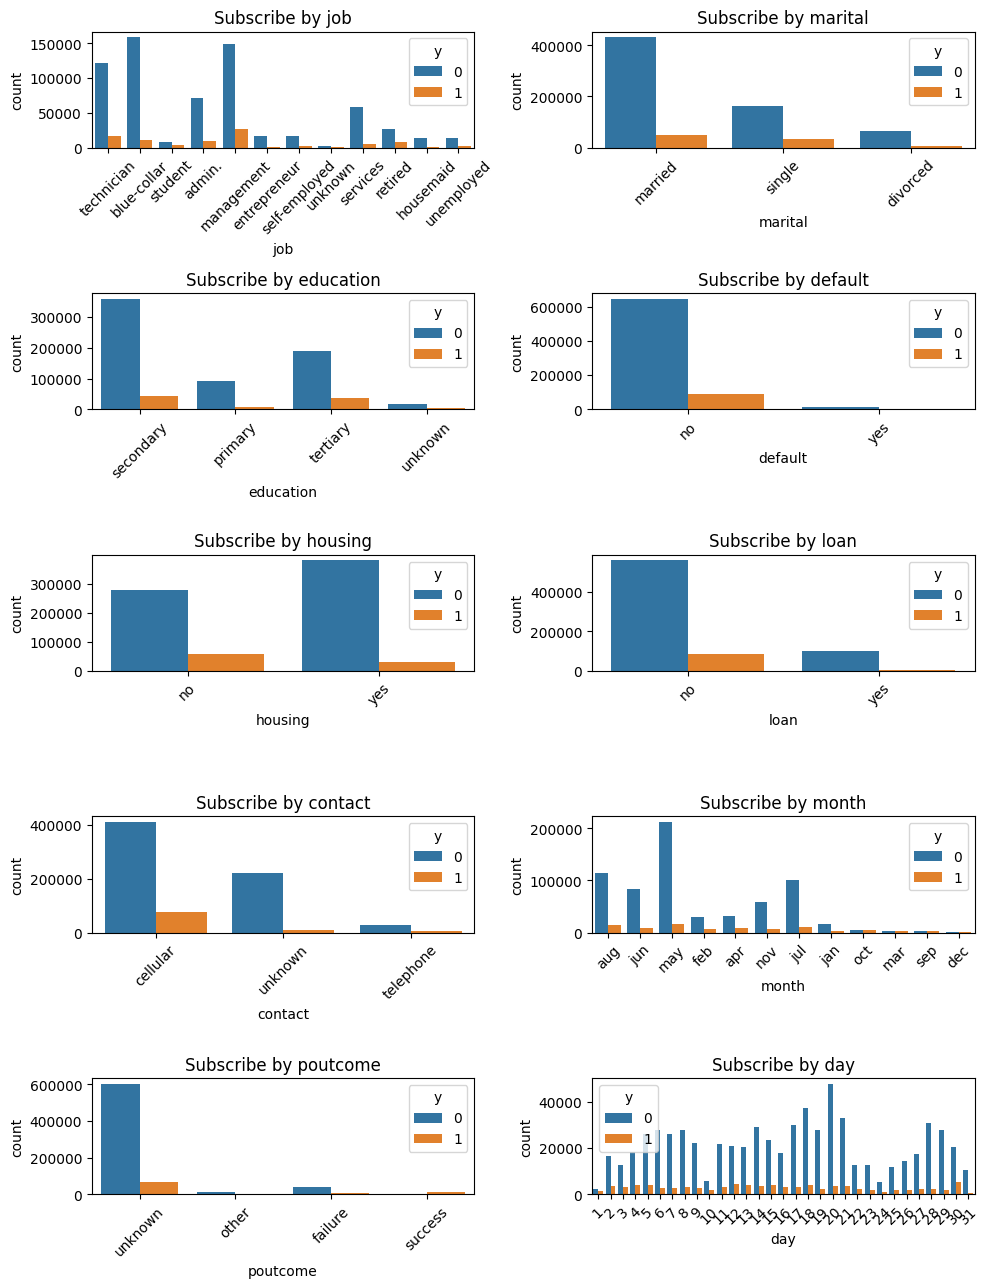

In [19]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(cat_columns, 1):
    plt.subplot(8, 2, i)
    sns.countplot(x=col, hue='y', data=df_train)
    plt.title(f'Subscribe by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

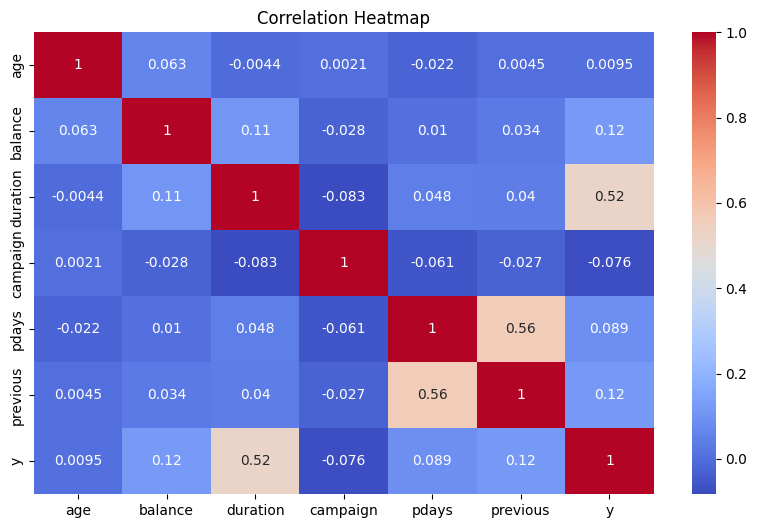

In [20]:
#df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_train[num_columns + ['y']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoders = {}

def object_to_int_train(series, col_name):
    if series.dtype == 'object':
        le = LabelEncoder()
        transformed = le.fit_transform(series)
        encoders[col_name] = le  # store the encoder
        return transformed
    return series


In [23]:
df_train = df_train.apply(lambda col: object_to_int_train(col, col.name))
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,9,1,1,0,7,0,0,0,25,1,117,3,-1,0,3,0
1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,0
2,36,1,1,1,0,602,1,0,2,14,8,111,2,-1,0,3,0
3,27,8,2,1,0,34,1,0,2,28,8,10,2,-1,0,3,0
4,26,9,1,1,0,889,1,0,0,3,3,902,1,-1,0,3,1


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   age        750000 non-null  int64
 1   job        750000 non-null  int64
 2   marital    750000 non-null  int64
 3   education  750000 non-null  int64
 4   default    750000 non-null  int64
 5   balance    750000 non-null  int64
 6   housing    750000 non-null  int64
 7   loan       750000 non-null  int64
 8   contact    750000 non-null  int64
 9   day        750000 non-null  int64
 10  month      750000 non-null  int64
 11  duration   750000 non-null  int64
 12  campaign   750000 non-null  int64
 13  pdays      750000 non-null  int64
 14  previous   750000 non-null  int64
 15  poutcome   750000 non-null  int64
 16  y          750000 non-null  int64
dtypes: int64(17)
memory usage: 97.3 MB


In [25]:
print("Categorical Columns:")
for col in cat_columns:
    print(f"{col}: {df_train[col].nunique()} unique values")

print("\nNumerical Columns:")
for col in num_columns:
    print(f"{col}: {df_train[col].nunique()} unique values")

Categorical Columns:
job: 12 unique values
marital: 3 unique values
education: 4 unique values
default: 2 unique values
housing: 2 unique values
loan: 2 unique values
contact: 3 unique values
month: 12 unique values
poutcome: 4 unique values
day: 31 unique values

Numerical Columns:
age: 78 unique values
balance: 8217 unique values
duration: 1760 unique values
campaign: 52 unique values
pdays: 596 unique values
previous: 50 unique values



# One-hot Encoding

In [26]:
oh_cat_cols=[]            # columns that shoud be One-hot encoded
for col in cat_columns:
    if len(df_train[col].unique())>2 :
        oh_cat_cols.append(col)

oh_cat_cols  

['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'day']

In [27]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)  
encoded_data = encoder.fit_transform(df_train[oh_cat_cols])

encoded_df_train = pd.DataFrame(
    encoded_data, 
    columns=encoder.get_feature_names_out(oh_cat_cols)  
)
df_train_encoded = pd.concat([df_train.drop(oh_cat_cols, axis=1), encoded_df_train], axis=1)

In [28]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,9,1,1,0,7,0,0,0,25,1,117,3,-1,0,3,0
1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,0
2,36,1,1,1,0,602,1,0,2,14,8,111,2,-1,0,3,0
3,27,8,2,1,0,34,1,0,2,28,8,10,2,-1,0,3,0
4,26,9,1,1,0,889,1,0,0,3,3,902,1,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,7,2,1,0,1282,0,1,2,4,5,1006,2,-1,0,3,1
749996,69,5,0,2,0,631,0,0,0,19,1,87,1,-1,0,3,0
749997,50,1,1,1,0,217,1,0,0,17,0,113,1,-1,0,3,0
749998,32,9,1,1,0,-274,0,0,0,26,1,108,6,-1,0,3,0


In [29]:
df_train_encoded

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,42,0,7,0,0,117,3,-1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38,0,514,0,0,185,1,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,0,602,1,0,111,2,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,0,34,1,0,10,2,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,26,0,889,1,0,902,1,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,0,1282,0,1,1006,2,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749996,69,0,631,0,0,87,1,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749997,50,0,217,1,0,113,1,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749998,32,0,-274,0,0,108,6,-1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Train-Val Split


In [66]:
from sklearn.model_selection import train_test_split

X = df_train_encoded.drop('y', axis=1)
y = df_train_encoded['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [67]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (675000, 71)
X_val shape: (75000, 71)
y_train shape: (675000,)
y_val shape: (75000,)


# Standardizing numeric attributes

In [68]:
num_columns

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [69]:
X_train[num_columns].describe()

,age,balance,duration,campaign,pdays,previous
count,675000.000000,675000.000000,675000.000000,675000.000000,675000.000000,675000.000000
mean,40.925156,1202.826720,256.214714,2.577388,22.363831,0.297630
std,10.098439,2819.625399,272.331670,2.719613,77.247483,1.310604
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,0.000000,91.000000,1.000000,-1.000000,0.000000
50%,39.000000,634.000000,133.000000,2.000000,-1.000000,0.000000
75%,48.000000,1390.000000,361.000000,3.000000,-1.000000,0.000000
max,95.000000,99717.000000,4918.000000,63.000000,871.000000,58.000000


In [70]:
X_val[num_columns].describe()

,age,balance,duration,campaign,pdays,previous
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,40.937547,1215.233493,256.359013,2.573587,22.852853,0.306787
std,10.102398,2980.241667,274.565163,2.708611,77.968736,1.545249
min,18.000000,-8019.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,0.000000,91.000000,1.000000,-1.000000,0.000000
50%,39.000000,635.000000,133.000000,2.000000,-1.000000,0.000000
75%,48.000000,1390.000000,361.000000,3.000000,-1.000000,0.000000
max,93.000000,98417.000000,4916.000000,51.000000,826.000000,200.000000


In [71]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])

X_val[num_columns] = scaler.transform(X_val[num_columns])

In [72]:
X_train[num_columns].describe()

,age,balance,duration,campaign,pdays,previous
count,6.750000e+05,6.750000e+05,6.750000e+05,6.750000e+05,6.750000e+05,6.750000e+05
mean,1.852674e-18,-1.263187e-17,-7.259115e-17,2.635850e-17,2.602165e-17,-1.153711e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.270170e+00,-3.270588e+00,-9.371474e-01,-5.800050e-01,-3.024545e-01,-2.270937e-01
25%,-7.847907e-01,-4.265913e-01,-6.066677e-01,-5.800050e-01,-3.024545e-01,-2.270937e-01
50%,-1.906391e-01,-2.017386e-01,-4.524439e-01,-2.123054e-01,-3.024545e-01,-2.270937e-01
75%,7.005884e-01,6.638237e-02,3.847711e-01,1.553942e-01,-3.024545e-01,-2.270937e-01
max,5.354777e+00,3.493877e+01,1.711806e+01,2.221737e+01,1.098595e+01,4.402734e+01


In [73]:
X_val[num_columns].describe()

,age,balance,duration,campaign,pdays,previous
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,0.001227,0.004400,0.000530,-0.001398,0.006331,0.006987
std,1.000393,1.056964,1.008202,0.995955,1.009338,1.179036
min,-2.270170,-3.270588,-0.926131,-0.580005,-0.302454,-0.227094
25%,-0.784791,-0.426591,-0.606668,-0.580005,-0.302454,-0.227094
50%,-0.190639,-0.201384,-0.452444,-0.212305,-0.302454,-0.227094
75%,0.700588,0.066382,0.384771,0.155394,-0.302454,-0.227094
max,5.156726,34.477717,17.110712,17.804974,10.403404,152.374415
